<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions19_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="25intro">7.2 Multiple Linear Regression</a>

---

In linear regression we are modeling a variable, y, relative to a predictor variable (or variables): $x_1$, $x_2$, etc.  The variable y is a continuous variable that is normally descributed.  The predictor variables can either be continuous or categorical variables.  Taking the simple example of two predictor variables: $x_1$ and $x_2$, the linear model can be described as:

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2$$

This can be generalized for any number of predictor variables.


# <a name="Lab19q1">Question 1: </a>

---

From the homework, we are looking at Forced expiratory volume (FEV), an index of pulmonary function that measures the volume of air expelled after 1 second of constant effort.  The dataset FEV which contains determinations of FEV in 1980 on 654 children ages 3 through 19 who were seen in the Childhood Respiratory Disease (CRD) Study in East Boston, Massachusetts. These data are part of a longitudinal study to follow the change in pulmonary function over time in children.


<br>
<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/FEVdatatableinfo.png" width="300">



In [1]:
#load in dataset
FEV <- read.csv("https://raw.githubusercontent.com/gibsonea/Biostats/main/Datasets/FEV.csv")
str(FEV)

'data.frame':	654 obs. of  6 variables:
 $ Id   : int  301 451 501 642 901 1701 1752 1753 1901 1951 ...
 $ Age  : int  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ Hgt  : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ Sex  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ Smoke: int  0 0 0 0 0 0 0 0 0 0 ...


The parameters for Sex and Smoke are integers.  We can change those to categorical variables in the code cell below.

In [2]:
FEV$Sex = factor(FEV$Sex, levels = c(0, 1), labels = c("Female", "Male"))
FEV$Smoke = factor(FEV$Smoke,levels = c(0, 1), labels = c("Nonsmoker", "Smoker"))

str(FEV)



'data.frame':	654 obs. of  6 variables:
 $ Id   : int  301 451 501 642 901 1701 1752 1753 1901 1951 ...
 $ Age  : int  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ Hgt  : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ Sex  : Factor w/ 2 levels "Female","Male": 1 1 1 2 2 1 1 1 1 1 ...
 $ Smoke: Factor w/ 2 levels "Nonsmoker","Smoker": 1 1 1 1 1 1 1 1 1 1 ...


Here, we use lm() to solve for the simple linear regression with one predictor variable, x = Age.  Summary command shows the statistics for the regression.  We are testing the following hypothesis.

$H_0: \beta = 0$

$H_1: \beta \neq 0$

In [3]:
lmFEVage = lm(FEV ~ Age, data = FEV)
summary(lmFEVage)




Call:
lm(formula = FEV ~ Age, data = FEV)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57539 -0.34567 -0.04989  0.32124  2.12786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.431648   0.077895   5.541 4.36e-08 ***
Age         0.222041   0.007518  29.533  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5675 on 652 degrees of freedom
Multiple R-squared:  0.5722,	Adjusted R-squared:  0.5716 
F-statistic: 872.2 on 1 and 652 DF,  p-value: < 2.2e-16


## <a name="Lab19q1a">Question 1a</a>

Answer the following:

(i) What is the test statistic for the F test?  What is the p-value?

(ii) What is the test statistic for the t test and the p-value?

(iii) What do you conclude from these results?

### Solution to Question 1a

---

<br>
(i). F = 872.2, p-value is <2.2e-16

(ii) t = 29.53, p value is <2.2e-16

(iii) We can conclude that FEV has a dependence on Age.
<br>

In the following code cell, we create a scatter plot and show the regression fit line and the 99% Confidence Interval for y.


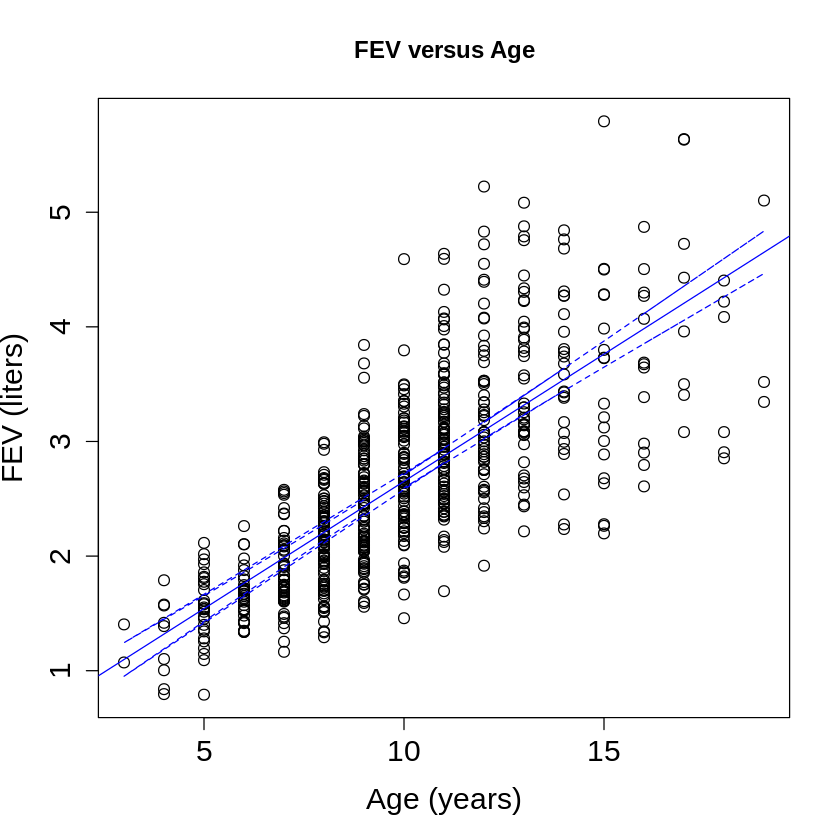

In [4]:
plot(FEV$Age,FEV$FEV,xlab = 'Age (years)', ylab = 'FEV (liters)' ,main = 'FEV versus Age',
cex = 1.2, cex.lab=1.5, cex.axis=1.5)

abline(lmFEVage, col="blue")

newx = unique(FEV$Age) # create a vector of values for Age (created with the unique values from our original sample data) that we will use to calculate the CI using predict() and then plot.
conf_interval <- predict(lmFEVage, newdata=data.frame(Age=newx), interval="confidence",
                         level = 0.99)

lines(newx, conf_interval[,2], col="blue", lty=2)
lines(newx, conf_interval[,3], col="blue", lty=2)

## <a name="Lab19q1b">Question 1b</a>

Why is the 99% confidence interval wider at the minimum and maximum values of Age compared to the center (closer to the mean Age)?

### Solution to Question 1b

---

The standard error of the estimate of y is given by the equation:

$se(y) = \sqrt{MSE \bigl(1+\frac{1}{n} + \frac{(x-\bar{x})^2}{L_{xx}}\bigr)}$

the last term is ~ (x - mean(x)) so for values of x far from the mean, the standard error will be larger in comparison with values of x close to the mean.  Subsequently the confidence interval will also be wider for values of x far from the mean.

<br>

# <a name="Lab19q2">Question 2: </a>

---

Now we want to perform a multiple linear regression with more than one predictors in our fit.  Below we perform a regression of y on Age and Height.

In [5]:

lmFEVagesex = lm(FEV ~ Age + Hgt, data = FEV)
summary(lmFEVagesex)



Call:
lm(formula = FEV ~ Age + Hgt, data = FEV)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50533 -0.25657 -0.01184  0.24575  2.01914 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.610466   0.224271 -20.558  < 2e-16 ***
Age          0.054281   0.009106   5.961 4.11e-09 ***
Hgt          0.109712   0.004716  23.263  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4197 on 651 degrees of freedom
Multiple R-squared:  0.7664,	Adjusted R-squared:  0.7657 
F-statistic:  1068 on 2 and 651 DF,  p-value: < 2.2e-16


## <a name="Lab19q2a">Question 2a</a>

For these questions, you can consult the lecture notes, recording or Rosner Ch. 11.

(i) What is the estimate and standard error of the slope for Age, $\beta_A$?


(ii) What is the is the estimate and standard error of the slope for Height, $\beta_H$?


(iii) What hypothesis are you testing with the Multiple Regression F test.  Write down the null/alternative hypotheses, define your variables and describe in a few sentences.

(iv) What is the p value from your F test and what do you conclude?

(v) What hypothesis are you testing with the Multiple Regression t test?  Write down the null/alternative hypotheses, define your variables and describe in a few sentences.

(vi) What are the p-value(s) from your t test(s) and what do you conclude?

(vii) What does the Multiple R-squared value tell you?

### Solution to Question 2a

---

<br>

(i) $b_{Age} = 0.0543$ and standard error is 0.00911

(ii) $b_{Hgt} = 0.110$ and standard error is 0.00472

(iii) $H_0: \beta_i = 0 $ for all predictors, i

$H_1: \beta_i \neq 0$ for at least one predictor

The null hypothesis states that there is no dependence of FEV on either age or height.  The alternate hypothesis states that there is a dependence of FEV on at least one of the parameters, height or age.

(iv) For the F test, the p value is < 2.2e-16

(v) $H_0: \beta_j = 0$ for predictor j

$H_1: \beta_j \neq 0$ for predictor j

The null hypothesis states that there is no dependence of FEV on the specific predictor j you are testing.  The alternative hypothesis states that there is a dependence of FEV on the specific predictor j.

(vi)

Age: t = 5.961, p = 4.11e-09

Hgt: t = 23.263, p = < 2e-16

(vii) The R-squared value is 0.7664 which means that 76.6% of the variance in FEV is due to its dependence on Age and Height.